<a href="https://colab.research.google.com/github/LeCache/LeCache/blob/main/2_copia_5_estefania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/cielo/blob/main/revision_bibloografica/c_2_geron/5_estefania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Video de apoyo a la lectura interactiva y experimental de este cuaderno]()  

Recuerde que la segunda parte de su exposición debe ser la práctica de implementación o de codificación de los conceptos y metodologías presentadas en la teoría leída. 

# Chapter 2 Geron

Páginas 117 a 130. 

### Temas a presentar

* Fine-Tune your model (Afinamiento de modelos con grilla de hiperparámetros)  
  * grid search (cuagrícula de búsqueda)  
  * Randomized search (Búsqueda aleatoria)  
  * Ensemble methods 
  * Analyze the best model and their errors 

## Download the Data

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def carga_datos():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

datos = carga_datos()

- El módulo **pathlib** es un componente importante de la biblioteca estándar de Python que nos permite manipular rutas de sistemas de archivos de forma rápida en cualquier sistema operativo- con módulo *path*.
- El módulo **tarfile** proporciona acceso de lectura y escritura a archivos de tar.
- El módulo **urllib.request** proporciona una interfaz de programación para usar recursos de Internet identificados por URLs.


## Look Data Structure

In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


En el dataframe observamos 10 atributos que correspondern a la informaación de los distritos.

In [ ]:
datos.columns
datos.columns = ['longitud', 'latitud', 'edad_promedio_casa', 'total_espacios', 'total_habitaciones','poblacion','hogares','ingreso_promedio', 'valor_promedio_casa','cercania_oceano']
datos.columns

Index(['longitud', 'latitud', 'edad_promedio_casa', 'total_espacios',
       'total_habitaciones', 'poblacion', 'hogares', 'ingreso_promedio',
       'valor_promedio_casa', 'cercania_oceano'],
      dtype='object')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitud             20640 non-null  float64
 1   latitud              20640 non-null  float64
 2   edad_promedio_casa   20640 non-null  float64
 3   total_espacios       20640 non-null  float64
 4   total_habitaciones   20433 non-null  float64
 5   poblacion            20640 non-null  float64
 6   hogares              20640 non-null  float64
 7   ingreso_promedio     20640 non-null  float64
 8   valor_promedio_casa  20640 non-null  float64
 9   cercania_oceano      20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- cada uno de los atributos posee 20 640 datos a excepción del total_habitaciones. 
- Nueve de los atributos poseen datos tipo numércios décimales o float y uno tipo object o de texto, miremos.

In [ ]:
datos["cercania_oceano"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: cercania_oceano, dtype: int64

Muestra las 5 categorias de las que se conforma la variable cercania_oceano

In [ ]:
datos.describe()

,longitud,latitud,edad_promedio_casa,total_espacios,total_habitaciones,poblacion,hogares,ingreso_promedio,valor_promedio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observamos:
- la cantidad de datos en cada variable 20640 a excepción de total_habitaciones con 20433.
- la media, como el valor promedio de las casas es de 206855.81.
- la desviación estandard que muestra la dispersión de los datos.
- los respectivos cuartiles que agrupa a los datos en cuartos porcentuales y les asigna una cantida tope. .


<function matplotlib.pyplot.show(*args, **kw)>

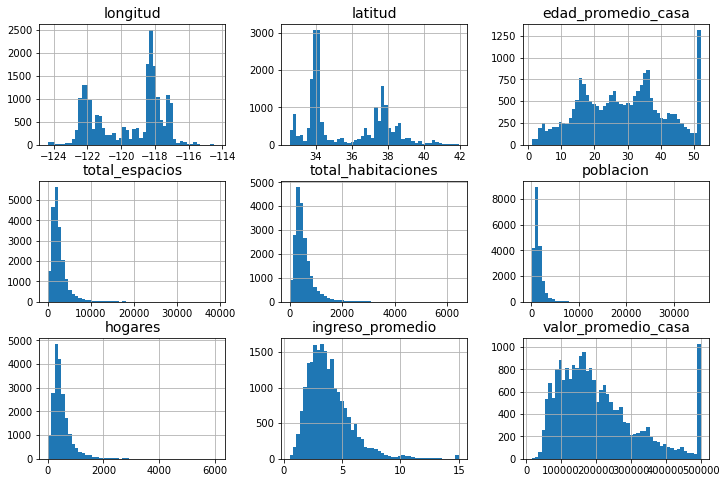

In [ ]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
datos.hist(bins=50, figsize=(12,8))
plt.show

- El valor del ingreso promedio se debe multiplicar por $10.000 

## Create a Test Set

In [ ]:
import numpy as np

def baraja_datos(data, test_ratio):
  baraja_indices = np.random.permutation(len(data))
  largo_test_set = int(len(data)*test_ratio)
  test_indices = baraja_indices[:largo_test_set]
  train_indices = baraja_indices[largo_test_set:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = baraja_datos(datos, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
np.random.seed(42)